![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [6]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [7]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
# Importación de librerías necesarias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Vectorización del texto usando CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predicciones sobre el conjunto de test
y_pred = rf_model.predict(X_test_vec)

# Evaluación del modelo con accuracy
accuracy_base = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con CountVectorizer: {accuracy_base:.4f}")


Accuracy del modelo con CountVectorizer: 0.7711


Reporte de clasificación:

              precision    recall  f1-score   support

    Negativo       0.78      0.96      0.86      3085
     Neutral       0.69      0.41      0.51       984
    Positivo       0.84      0.47      0.60       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832



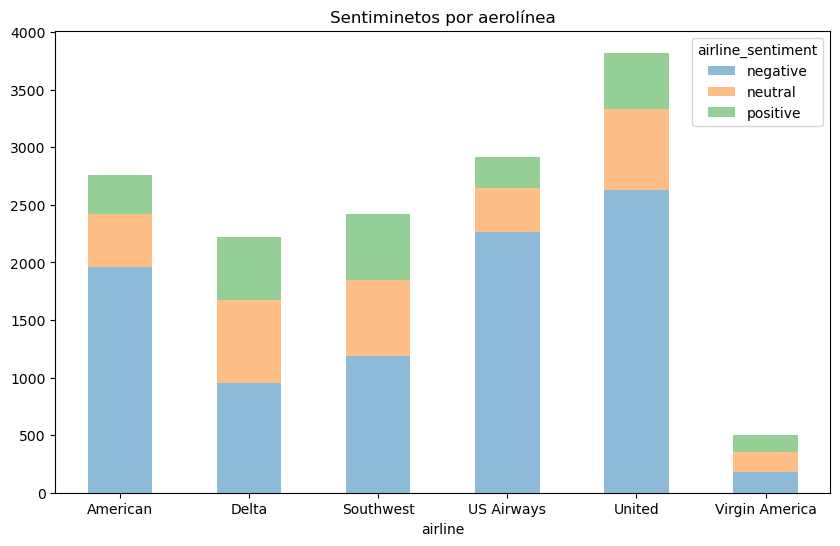

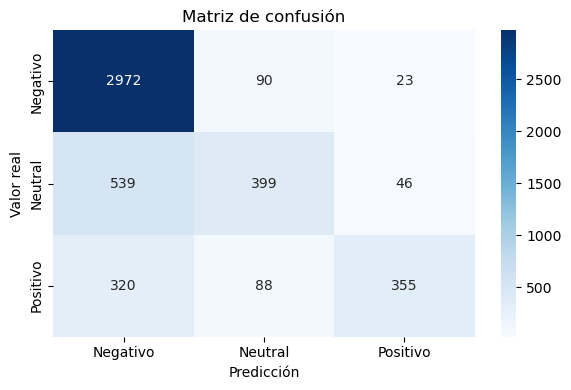

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Neutral', 'Positivo']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negativo', 'Neutral', 'Positivo'],
            yticklabels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Accuracy del modelo con stopwords eliminadas: 0.7618

Reporte de clasificación:

              precision    recall  f1-score   support

    Negativo       0.82      0.89      0.85      3085
     Neutral       0.57      0.49      0.53       984
    Positivo       0.71      0.60      0.65       763

    accuracy                           0.76      4832
   macro avg       0.70      0.66      0.68      4832
weighted avg       0.75      0.76      0.75      4832



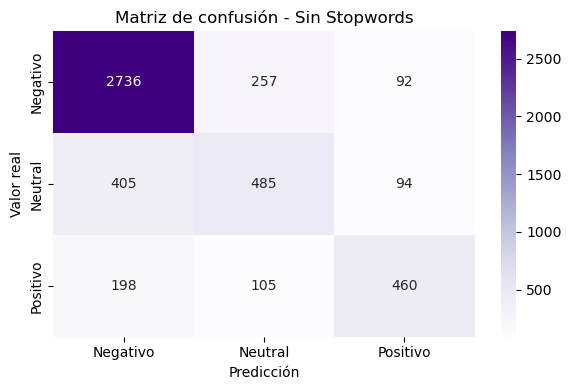

In [14]:
# Celda 2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorización del texto eliminando stopwords
vectorizer_sw = CountVectorizer(stop_words='english')
X_train_vec_sw = vectorizer_sw.fit_transform(X_train)
X_test_vec_sw = vectorizer_sw.transform(X_test)

# Modelo Random Forest
rf_model_sw = RandomForestClassifier(random_state=42)
rf_model_sw.fit(X_train_vec_sw, y_train)

# Predicciones
y_pred_sw = rf_model_sw.predict(X_test_vec_sw)

# Accuracy
accuracy_sw = accuracy_score(y_test, y_pred_sw)
print(f"Accuracy del modelo con stopwords eliminadas: {accuracy_sw:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_sw, target_names=['Negativo', 'Neutral', 'Positivo']))

# Matriz de confusión
cm_sw = confusion_matrix(y_test, y_pred_sw)
plt.figure(figsize=(6,4))
sns.heatmap(cm_sw, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Negativo', 'Neutral', 'Positivo'],
            yticklabels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Sin Stopwords")
plt.tight_layout()
plt.show()


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Accuracy del modelo con lematización (verbos): 0.7599

Reporte de clasificación:

              precision    recall  f1-score   support

    Negativo       0.82      0.89      0.85      3085
     Neutral       0.57      0.49      0.53       984
    Positivo       0.70      0.59      0.64       763

    accuracy                           0.76      4832
   macro avg       0.70      0.66      0.67      4832
weighted avg       0.75      0.76      0.75      4832



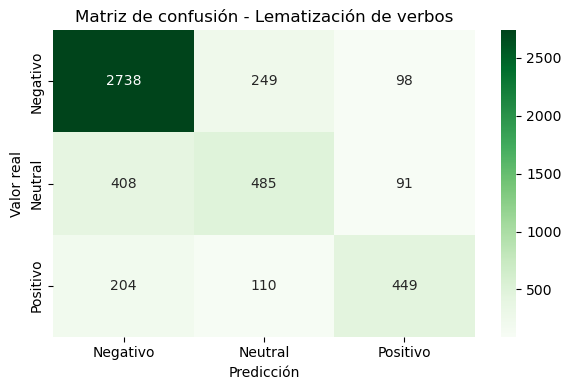

In [16]:
# Celda 3
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Función para mapear POS tags a los que acepta WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    else:
        return wordnet.NOUN  # default a NOUN si no es verbo

# Lematización centrada en verbos
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized)


# Aplicar lematización a los conjuntos de entrenamiento y prueba
X_train_lemma = X_train.apply(lemmatize_text)
X_test_lemma = X_test.apply(lemmatize_text)

# Vectorización
vectorizer_lemma = CountVectorizer(stop_words='english')
X_train_vec_lemma = vectorizer_lemma.fit_transform(X_train_lemma)
X_test_vec_lemma = vectorizer_lemma.transform(X_test_lemma)

# Entrenamiento del modelo
rf_model_lemma = RandomForestClassifier(random_state=42)
rf_model_lemma.fit(X_train_vec_lemma, y_train)

# Predicciones y evaluación
y_pred_lemma = rf_model_lemma.predict(X_test_vec_lemma)
accuracy_lemma = accuracy_score(y_test, y_pred_lemma)
print(f"Accuracy del modelo con lematización (verbos): {accuracy_lemma:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_lemma, target_names=['Negativo', 'Neutral', 'Positivo']))

# Matriz de confusión
cm_lemma = confusion_matrix(y_test, y_pred_lemma)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lemma, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Negativo', 'Neutral', 'Positivo'],
            yticklabels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Lematización de verbos")
plt.tight_layout()
plt.show()


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FRANCISCO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy del modelo (stopwords eliminadas + lematización): 0.7719

Reporte de clasificación:

              precision    recall  f1-score   support

    Negativo       0.81      0.92      0.86      3085
     Neutral       0.60      0.47      0.53       984
    Positivo       0.76      0.58      0.65       763

    accuracy                           0.77      4832
   macro avg       0.72      0.65      0.68      4832
weighted avg       0.76      0.77      0.76      4832



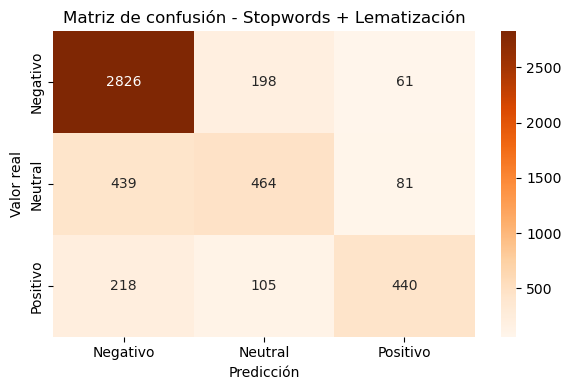

In [17]:
# Celda 4
# Descargar recursos de NLTK (solo es necesario la primera vez)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Imports
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para mapear etiquetas POS a WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    else:
        return wordnet.NOUN

# Función para lematizar eliminando stopwords
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(word.lower(), get_wordnet_pos(pos))
        for word, pos in pos_tags
        if word.lower() not in stop_words and word.isalpha()
    ]
    return ' '.join(lemmatized)

# Aplicar a los conjuntos
X_train_clean = X_train.apply(preprocess_text)
X_test_clean = X_test.apply(preprocess_text)

# Vectorización
vectorizer_multi = CountVectorizer()
X_train_vec_multi = vectorizer_multi.fit_transform(X_train_clean)
X_test_vec_multi = vectorizer_multi.transform(X_test_clean)

# Modelo
rf_model_multi = RandomForestClassifier(random_state=42)
rf_model_multi.fit(X_train_vec_multi, y_train)

# Predicciones
y_pred_multi = rf_model_multi.predict(X_test_vec_multi)

# Evaluación
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy del modelo (stopwords eliminadas + lematización): {accuracy_multi:.4f}")

# Reporte
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_multi, target_names=['Negativo', 'Neutral', 'Positivo']))

# Matriz de confusión
cm_multi = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(6,4))
sns.heatmap(cm_multi, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Negativo', 'Neutral', 'Positivo'],
            yticklabels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Stopwords + Lematización")
plt.tight_layout()
plt.show()


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [18]:
# Celda 5
results = pd.DataFrame({
    'Modelo': [
        '1. Baseline (CountVectorizer)',
        '2. Stopwords eliminadas',
        '3. Lematización de verbos',
        '4. Stopwords + Lematización'
    ],
    'Accuracy': [
        accuracy_base,     # desde punto 1
        accuracy_sw,       # desde punto 2
        accuracy_lemma,    # desde punto 3
        accuracy_multi     # desde punto 4
    ]
})

results.sort_values(by='Accuracy', ascending=False, inplace=True)
print(results)


                          Modelo  Accuracy
3    4. Stopwords + Lematización  0.771937
0  1. Baseline (CountVectorizer)  0.771109
1        2. Stopwords eliminadas  0.761796
2      3. Lematización de verbos  0.759934


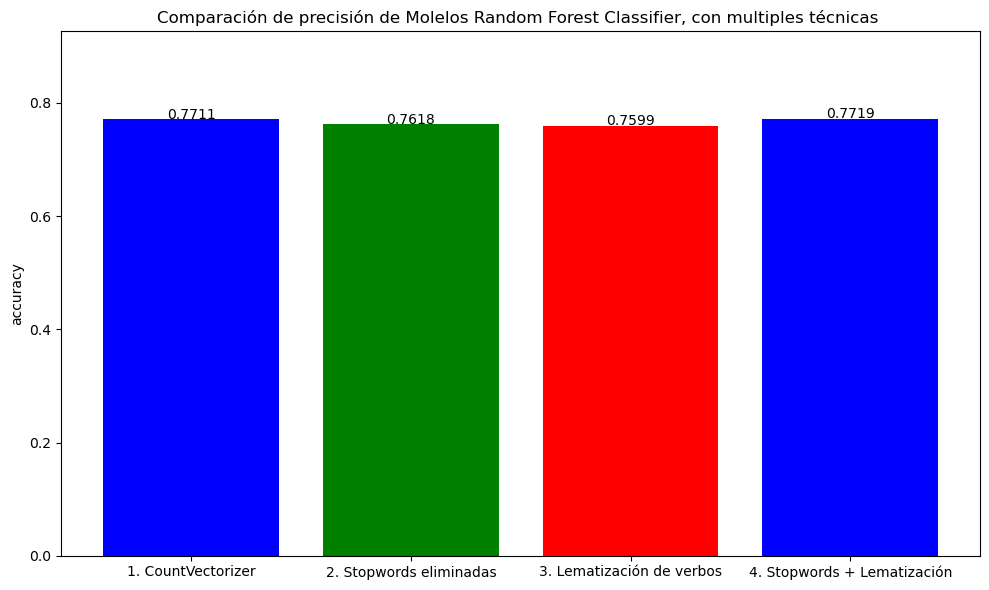

In [21]:
import matplotlib.pyplot as plt

modelos = ['1. CountVectorizer',
        '2. Stopwords eliminadas',
        '3. Lematización de verbos',
        '4. Stopwords + Lematización']
mse_valores = [accuracy_base,
        accuracy_sw,
        accuracy_lemma,
        accuracy_multi]

# Crear gráfico de barras simple
plt.figure(figsize=(10, 6))
barras = plt.bar(modelos, mse_valores, color=['blue', 'green', 'red'])

# Añadir etiquetas y título
plt.title('Comparación de precisión de Molelos Random Forest Classifier, con multiples técnicas ')
plt.ylabel('accuracy')
plt.ylim(0, max(mse_valores) * 1.2)  # Ajustar el límite superior del eje y

# Añadir los valores de MSE encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura + 0.0005,
            f'{altura:.4f}', ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Análisis de los resultados

**Modelo con mejor desempeño:**

**Modelo 4: Stopwords + Lematización (accuracy = 0.7719)**

Este modelo combina dos técnicas de limpieza semántica:
•	Eliminación de palabras irrelevantes (stopwords) que no aportan al análisis de sentimiento (como “the”, “is”, “and”).
•	Lematización con foco en verbos, lo que normaliza distintas formas verbales ("delayed", "delaying", "delay") a su raíz, mejorando la representación del texto.
 Ventajas:
•	Reducción del ruido gramatical.
•	Mejor generalización del modelo ante formas gramaticales diferentes.
•	Menor dimensionalidad útil.
________________________________________
**Modelo 1 (Count Vectorizer sin preprocesamiento):**
Modelo 1: CountVectorizer sin limpieza (accuracy = 0.7711)

Sorprendentemente, el modelo base se comporta casi igual que el mejor modelo, lo que indica que:
•	Los datos ya contienen una señal clara de sentimiento.
•	Random Forest es robusto frente a cierto nivel de ruido textual.

________________________________________
**Modelo base con preprocesamiento:**
Modelo 2: CountVectorizer con stop words eliminadas (accuracy = 0.7618)

El Modelo 2 muestra que una limpieza parcial es útil pero no óptima. Para problemas como análisis de sentimiento, la combinación de eliminación de stopwords con lematización (modelo 4) ofrece mejores resultados, ya que logra un balance entre reducción de ruido y conservación de la semántica.  En este caso desmejoró el comportamiento del modelo sin preprocesamiento.
________________________________________
**Modelo con peor desempeño:**
Modelo 3: solo lematización (accuracy = 0.7599)

Este modelo aplica lematización sin eliminar stopwords, lo que puede generar vectores donde aún predominan palabras poco informativas.
Desventajas:
•	Las stopwords actúan como ruido.
•	La lematización sola no es suficiente para una buena representación semántica.
________________________________________
 **Conclusión general:**
 
•	El mejor rendimiento se obtiene al combinar técnicas de limpieza: eliminar stopwords y aplicar lematización.
•	Si se tiene poco tiempo, el modelo base puede funcionar bien, pero no es tan robusto.
•	La limpieza del texto es útil, pero debe estar equilibrada: limpiar solo parcialmente (como solo lematizar) puede ser contraproducente.
